# <a href="https://thetahat.ru/">Phystech@DataScience</a>


## Семинар 1. Часть 2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, **не исправляйте и не удаляйте условия!** Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать в виде $\LaTeX$ в markdown-ячейках.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  20 баллов.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# фиксируем seed для воспроизводимости результатов
random_state = 42

In [3]:
# Bot check

# HW_ID: phds_sem1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status:  final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

### Задача 1

**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ для обучающей и тестовой выборок.

In [5]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [9]:
accs_train = []
accs_test = []

for k in range(1,21):
  knn =  KNeighborsClassifier(n_neighbors = k)# инициализация модели
  knn.fit(X_train, y_train) # обучения модели
  y_train_pred = knn.predict(X_train)
  acc_train = accuracy_score(y_train, y_train_pred)  
  accs_train.append(acc_train) # предсказание модели и расчет метрик
  y_test_pred = knn.predict(X_test)
  acc_test = accuracy_score(y_test, y_test_pred)
  accs_test.append(acc_test)

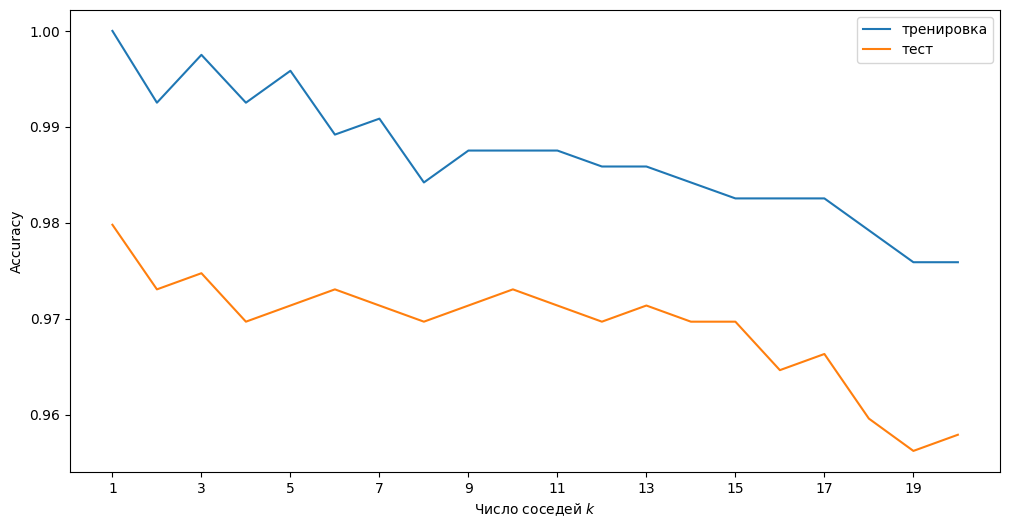

In [10]:
plt.figure(figsize=(12,6))
x = np.arange(1, 21)
plt.plot(x,accs_train, label = 'тренировка')
plt.plot(x,accs_test, label = 'тест')
plt.legend()
plt.xticks(range(1,20, 2))
plt.xlabel(r'Число соседей $k$')
plt.ylabel('Accuracy');

&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

&#x1f4a1; **Ответ**: потому что при тренировке он смотрит на самого себя, зная ответ заранее (как выучить матрицу ответов для какого-нибудь теста, не понимая вопросов)

Сделайте выводы о характере зависимости кривых качества на трейне и тесте. Чем может быть обусловлена такая зависимость?

**Вывод:** при ориентации на к=1 соседей значение точности выше, так как он смотрит на самого себя. затем, при к=5-10, плоская часть графика, точность примерно одинакова. Далее, при увеличении количества соседей, точность заметно снижается. Снижение точности связано с тем, что соседей другого типа может быть больше, при условии, что они находятся дальше,чем соседи совпадающего типа.

---
© 2026 команда <a href="https://thetahat.ru/">ThetaHat</a> для Phystech@DataScience